In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# **Image Load and Preprocessing**

In [2]:
# Define the paths
train_dir = 'dataset_raw/train'
val_dir = 'dataset_raw/val'
test_dir = 'dataset_raw/test'

# Image data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

Found 6253 images belonging to 2 classes.
Found 6221 images belonging to 2 classes.
Found 6216 images belonging to 2 classes.


# **Model Setup**

In [3]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

Epoch 1/10
 63/162 ━━━━━━━━━━━━━━━━━━━━ 2:17 1s/step - accuracy: 0.7955 - loss: 0.4618

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


162/162 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.7992 - loss: 0.4538 - val_accuracy: 0.8100 - val_loss: 0.4484
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 45s 258ms/step - accuracy: 0.8337 - loss: 0.3885 - val_accuracy: 0.7143 - val_loss: 0.9121
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 71s 423ms/step - accuracy: 0.8432 - loss: 0.3696 - val_accuracy: 0.7900 - val_loss: 0.4917
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 43s 251ms/step - accuracy: 0.8556 - loss: 0.3389 - val_accuracy: 0.8095 - val_loss: 0.3910
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 79s 472ms/step - accuracy: 0.8757 - loss: 0.2967 - val_accuracy: 0.8279 - val_loss: 0.3961
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 51s 291ms/step - accuracy: 0.8904 - loss: 0.2623 - val_accuracy: 0.9524 - val_loss: 0.3346
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 91s 540ms/step - accuracy: 0.8905 - loss: 0.2638 - val_accuracy: 0.8332 - val_loss: 0.4177
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 52s 294ms/step - accuracy: 0.9108 - loss: 0.2233 - val_a

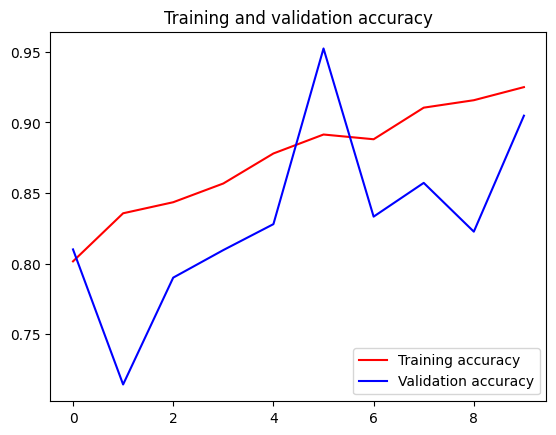

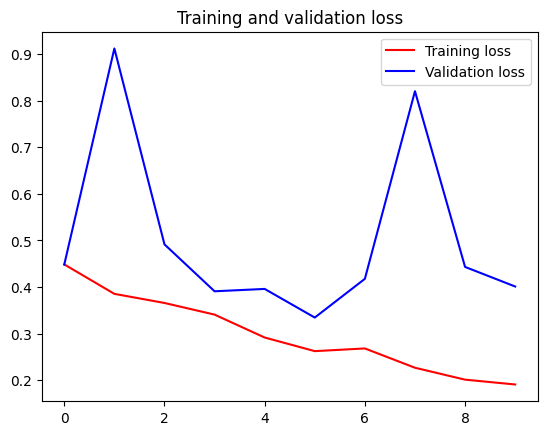

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=162,  # Number of batches to train on per epoch
    epochs=10,  # Number of epochs to train
    validation_data=val_generator,
    validation_steps=62  # Number of batches to validate on
)

# Plot the training and validation accuracy
loss, accuracy = model.evaluate(test_generator, steps=10)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Evaluation Metrics**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test accuracy: 82.50%
Precision: 0.8095
Recall: 0.8500
F1 Score: 0.8293


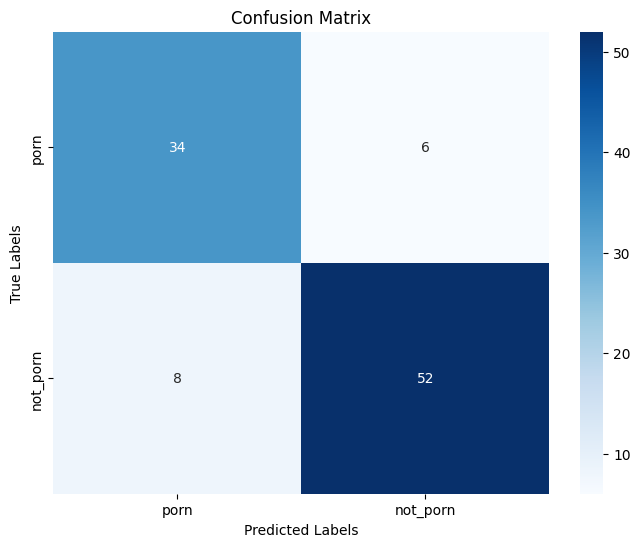

In [21]:
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Function to decode predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'not_porn' for pred in preds]
decoded_predictions = decode_predictions(predictions.flatten())  # Ensure predictions are flattened if necessary
decoded_labels = ['porn' if label == 1 else 'not_porn' for label in test_labels]

# Test scores
precision = precision_score(decoded_labels, decoded_predictions, pos_label='porn')
recall = recall_score(decoded_labels, decoded_predictions, pos_label='porn')
f1 = f1_score(decoded_labels, decoded_predictions, pos_label='porn')
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(decoded_labels, decoded_predictions, labels=['porn', 'not_porn'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['porn', 'not_porn'], yticklabels=['porn', 'not_porn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Test Prediction**

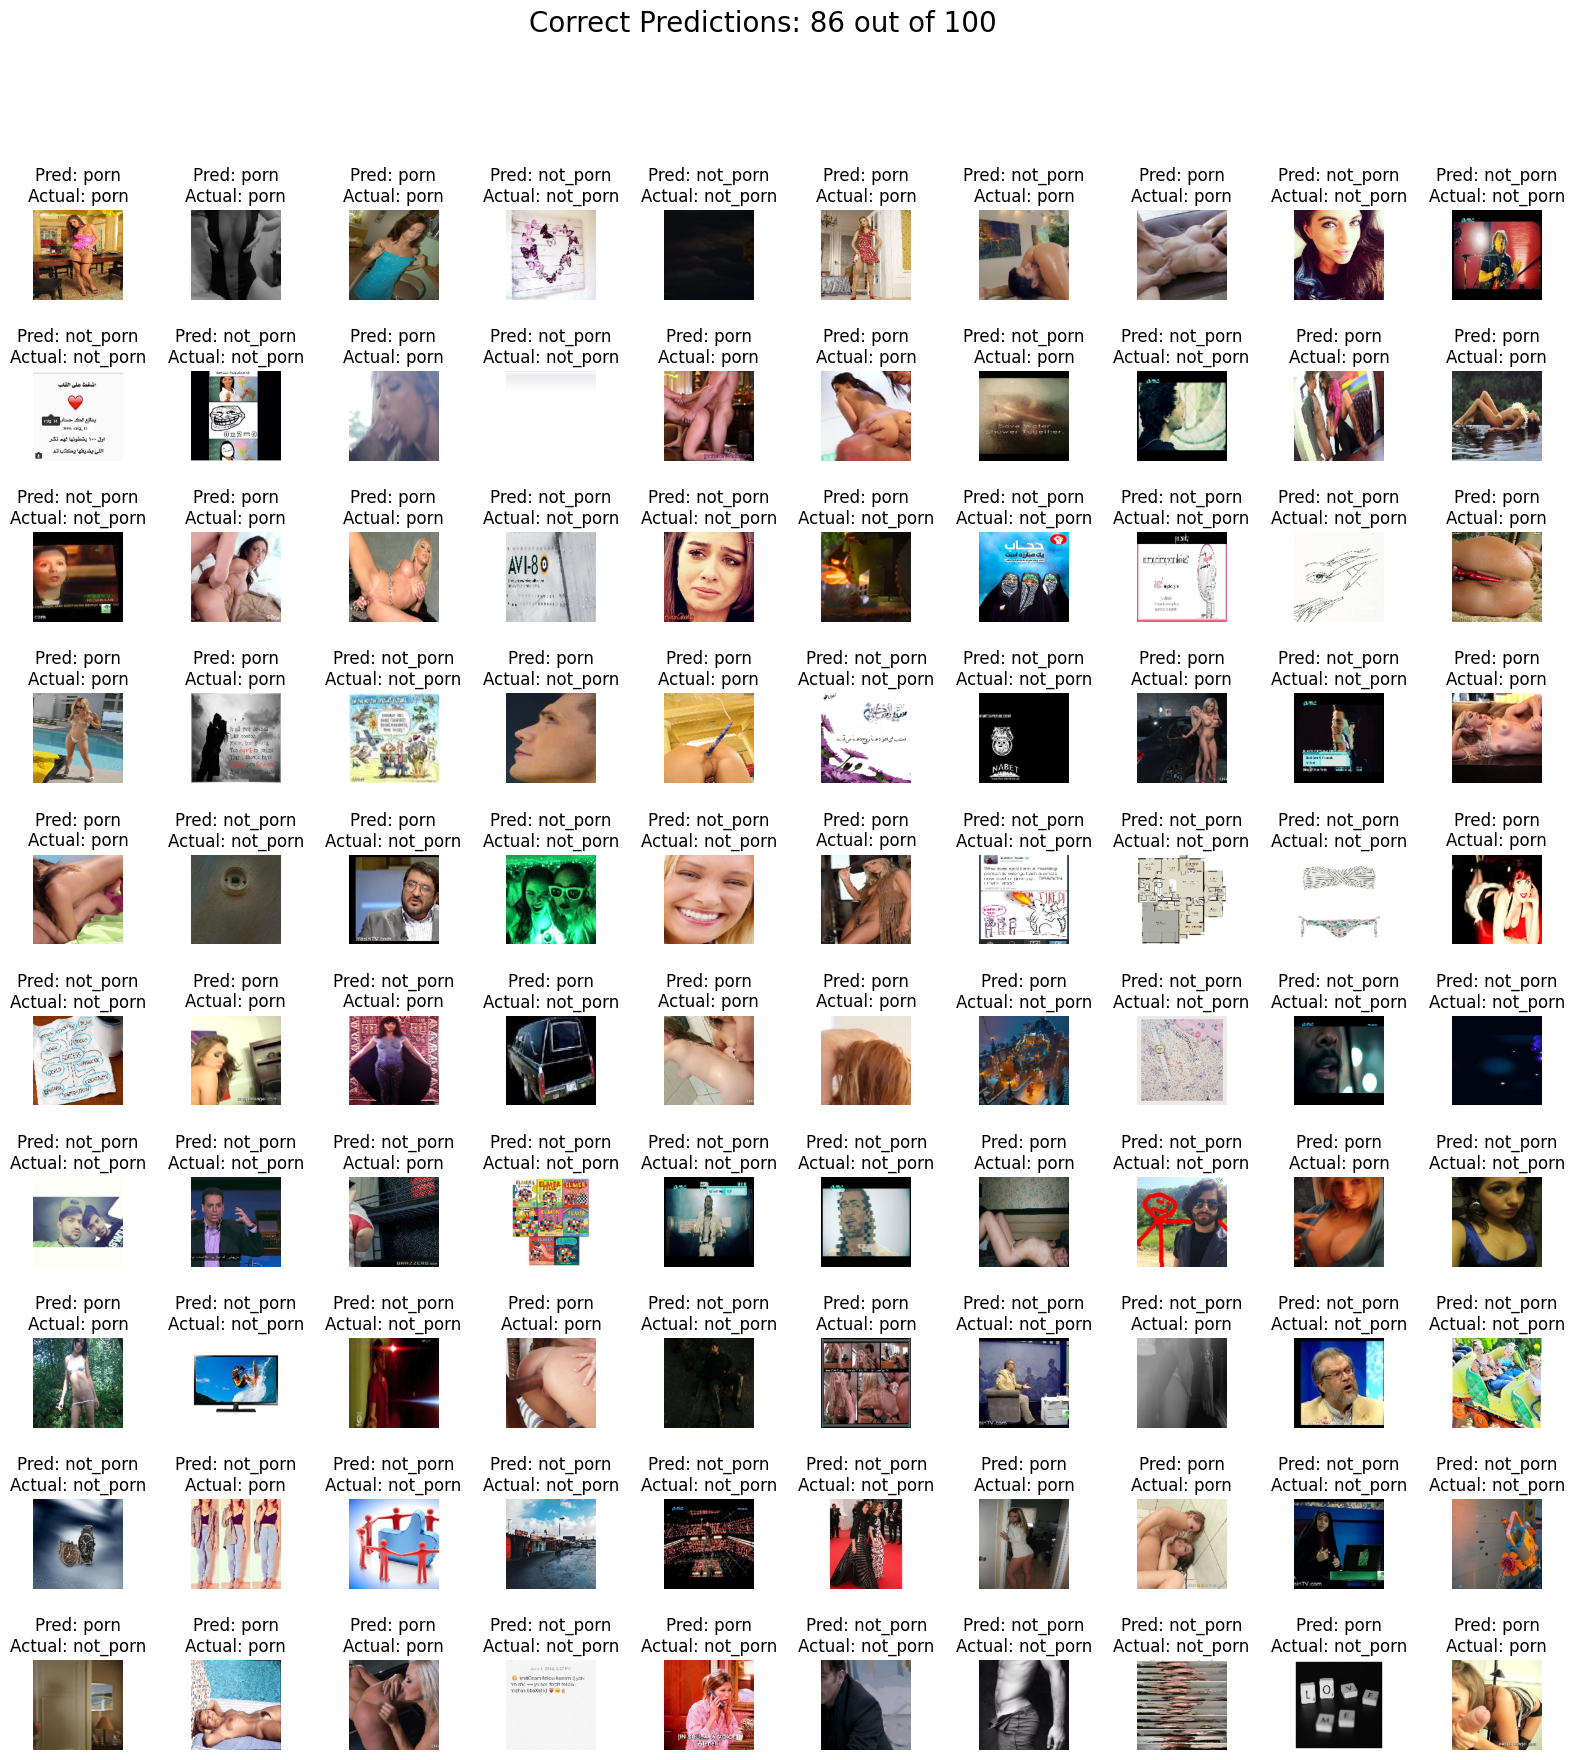

In [22]:
correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'not_porn' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])
plt.figure(figsize=(20, 20))
for i in range(len(test_images)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {decoded_predictions[i]}\nActual: {'porn' if test_labels[i] == 1 else 'not_porn'}")
    plt.axis('off')

# Display the count of correct predictions
plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
plt.subplots_adjust(hspace=0.8)
plt.show()

# **Save**

In [23]:
# model.save('model_v1.2.h5')